In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import scipy

In [2]:
from sklearn import metrics, model_selection, preprocessing, ensemble, tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [3]:
from sklearn.utils import shuffle

In [4]:
Ames = pd.read_csv('AmesFinalDB.csv')
Ames.drop(['Unnamed: 0'],axis=1,inplace=True)
Ames.head(3)

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Lot_Shape,Land_Contour,Lot_Config,Land_Slope,Neighborhood,Condition_1,...,Mo_Sold,Sale_Type,Sale_Condition,SalePrice,exterior,basement_type,basement_area,age,remodeled_age,garage_age
0,20,RL,141.0,31770,IR1,Lvl,Corner,Gtl,NAmes,Norm,...,5,WD,Normal,215000,0,BLQ_Unf,639.0,50,0,50.0
1,20,RH,80.0,11622,Reg,Lvl,Inside,Gtl,NAmes,Feedr,...,6,WD,Normal,105000,VinylSd_VinylSd,Rec_LwQ,612.0,49,0,49.0
2,20,RL,81.0,14267,IR1,Lvl,Corner,Gtl,NAmes,Norm,...,6,WD,Normal,172000,Wd Sdng_Wd Sdng,ALQ_Unf,923.0,52,0,52.0


In [5]:
print('Ames shape is : ', str(Ames.shape))

Ames shape is :  (2930, 59)


In [6]:
categorical_features = ['MS_SubClass','MS_Zoning','Lot_Shape','Land_Contour','Lot_Config','Land_Slope']
categorical_features.extend(['Neighborhood','Condition_1','Bldg_Type','House_Style','Roof_Style'])
categorical_features.extend(['Mas_Vnr_Type','Exter_Qual','Exter_Cond','Foundation','Bsmt_Qual','Bsmt_Exposure'])
categorical_features.extend(['basement_type','Heating_QC','Garage_Finish','Mo_Sold','Sale_Type','Sale_Condition','Kitchen_Qual'])
categorical_features.extend(['exterior','Fireplace_Qu','Garage_Type','Garage_Qual'])

Ordinal_featues = ['Overall_Qual','Overall_Cond','Bsmt_Full_Bath','Bsmt_Half_Bath','Bedroom_AbvGr','Full_Bath',
                  'Half_Bath','Kitchen_AbvGr','TotRms_AbvGrd','Fireplaces','Garage_Cars']

Continous_features = ['Lot_Frontage','Lot_Area','age','remodeled_age','Mas_Vnr_Area','basement_area']
Continous_features.extend(['Bsmt_Unf_SF','Total_Bsmt_SF','1st_Flr_SF','2nd_Flr_SF','Low_Qual_Fin_SF'])
Continous_features.extend(['Gr_Liv_Area'])              
Continous_features.extend(['Garage_Area'])
Continous_features.extend(['Wood_Deck_SF','Open_Porch_SF','Enclosed_Porch','Screen_Porch','Pool_Area'])
Continous_features.extend(['SalePrice','garage_age'])

In [7]:
Ames = shuffle(Ames)
X = Ames.drop(['SalePrice'],axis=1).copy()
Y = Ames.SalePrice.copy()

In [8]:
AmesFinal = X.drop(categorical_features,axis = 1)
AmesData = AmesFinal.values
AmesCol = AmesFinal.columns

for ifeature in categorical_features:
    
    temp_df = pd.get_dummies(Ames.loc[:,ifeature], prefix = ifeature, prefix_sep = '_')
    AmesCol = list(AmesCol) + list(temp_df.columns)
    temp_data = temp_df.values
    AmesData = np.hstack([AmesData,temp_data])
    
AmesFinal = pd.DataFrame(AmesData, columns = AmesCol)

In [9]:
print('Ames final shape is : ', str(AmesFinal.shape))

Ames final shape is :  (2930, 254)


In [10]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(AmesFinal)

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(AmesFinal,Y,test_size = 0.33)

In [12]:
from sklearn.ensemble import GradientBoostingRegressor

In [13]:
gbr = GradientBoostingRegressor()
gbr.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [48]:
gbr = GradientBoostingRegressor()
gbr.set_params(random_state=144)
gbr.fit(X_train,Y_train)

R2_train = np.round(gbr.score(X_train,Y_train),3)
R2_test  = np.round(gbr.score(X_test,Y_test),3)

print('Training score is :'+ str(R2_train))
print('Testing  score is :'+ str(R2_test))

Training score is :0.965
Testing  score is :0.919


In [46]:
from plot_function import plot_randomforest

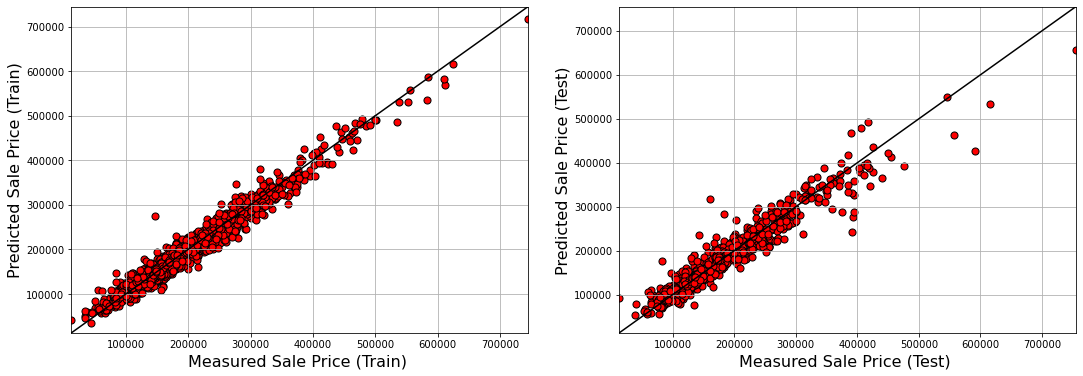

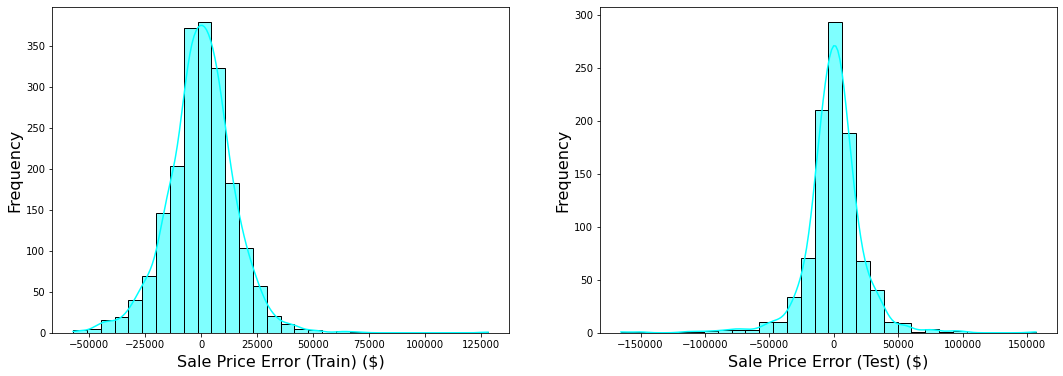

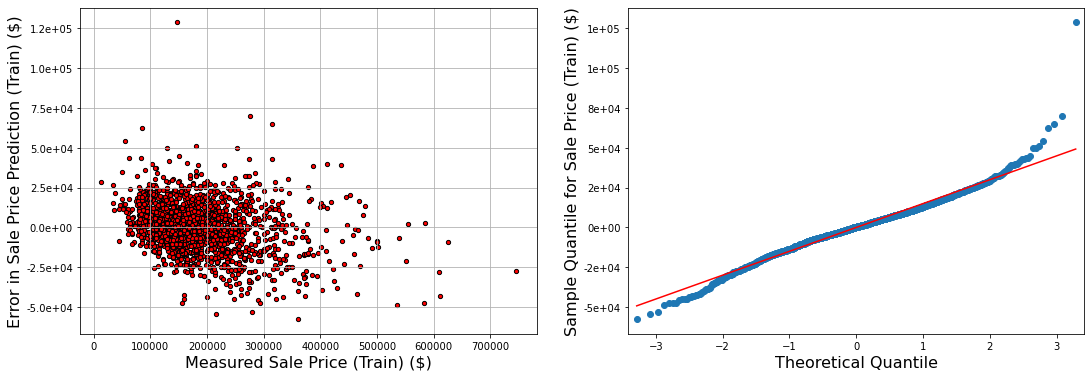

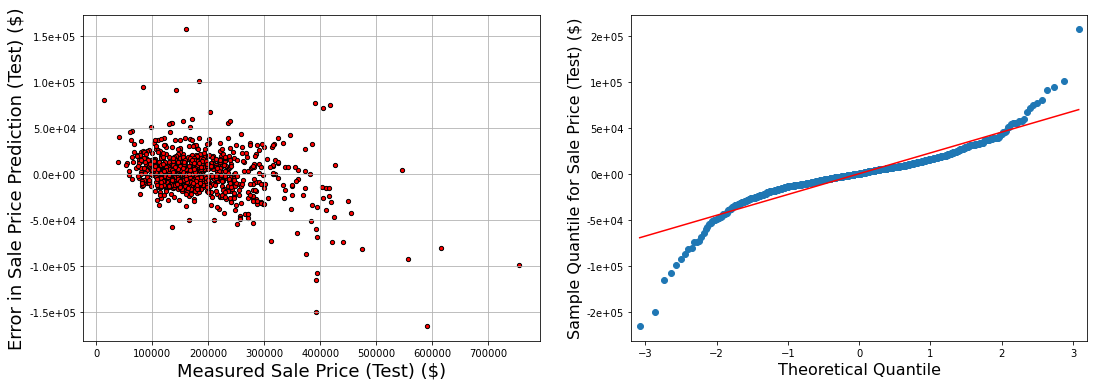

In [47]:
plot_randomforest(gbr,X_train,X_test,Y_train,Y_test)

In [49]:
from sklearn.model_selection import cross_val_score
train_score = cross_val_score(gbr,X_train,Y_train,cv=5)
test_score  = cross_val_score(gbr, X_test, Y_test,cv=5) 
print(train_score)
print(test_score)
print(np.mean(train_score))
print(np.mean(test_score))

[0.88837446 0.81173955 0.91662021 0.90085858 0.93222291]
[0.83912126 0.82426466 0.83749933 0.92827978 0.89201952]
0.8899631417434459
0.864236911992794


In [50]:
gbr = GradientBoostingRegressor()
gbr.set_params(learning_rate = 0.8, random_state = 144, n_estimators = 500, min_weight_fraction_leaf = 0.1)
gbr.fit(X_train,Y_train)

R2_train = np.round(gbr.score(X_train,Y_train),3)
R2_test  = np.round(gbr.score(X_test,Y_test),3)

print('Training score is :'+ str(R2_train))
print('Testing  score is :'+ str(R2_test))

Training score is :0.983
Testing  score is :0.84


In [51]:
train_score = cross_val_score(gbr,X_train,Y_train,cv=5)
test_score  = cross_val_score(gbr, X_test, Y_test,cv=5) 
print(train_score)
print(test_score)
print(np.mean(train_score))
print(np.mean(test_score))

[0.85025884 0.80103074 0.85089625 0.87506195 0.87578494]
[0.66095376 0.68592292 0.70958428 0.81305103 0.77941871]
0.8506065445760502
0.7297861386089894


In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale,Y,test_size = 0.33)

In [17]:
gbr = GradientBoostingRegressor()
gbr.set_params(learning_rate = 0.8, random_state = 144, n_estimators = 500)
gbr.fit(X_train,Y_train)

R2_train = np.round(gbr.score(X_train,Y_train),3)
R2_test  = np.round(gbr.score(X_test,Y_test),3)

print('Training score is :'+ str(R2_train))
print('Testing  score is :'+ str(R2_test))

Training score is :1.0
Testing  score is :0.87


In [18]:
fitted_data, fitted_lambda = scipy.stats.boxcox(Y)
print('Lambda parameter is :', fitted_lambda)

Lambda parameter is : 0.007644153960342838


In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(AmesFinal,fitted_data,test_size = 0.33)

In [20]:
gbr = GradientBoostingRegressor()
gbr.set_params(learning_rate = 0.8, random_state = 144, n_estimators = 500)
gbr.fit(X_train,Y_train)

R2_train = np.round(gbr.score(X_train,Y_train),3)
R2_test  = np.round(gbr.score(X_test,Y_test),3)

print('Training score is :'+ str(R2_train))
print('Testing  score is :'+ str(R2_test))

Training score is :1.0
Testing  score is :0.837


In [21]:
AmesPCA = pd.read_csv('PCAData.csv')
AmesPCA.drop(['Unnamed: 0'],axis=1,inplace=True)
print(AmesPCA.shape)

(2930, 120)


In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(AmesPCA,Y,test_size = 0.33)

In [23]:
gbr.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.8,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_iter_no_change': None,
 'random_state': 144,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [24]:
?gbr

In [25]:
gbr = GradientBoostingRegressor()
gbr.set_params(learning_rate=0.1,n_estimators=500)
gbr.fit(X_train,Y_train)

R2_train = np.round(gbr.score(X_train,Y_train),3)
R2_test  = np.round(gbr.score(X_test,Y_test),3)

print('Training score is :'+ str(R2_train))
print('Testing  score is :'+ str(R2_test))

Training score is :0.881
Testing  score is :-0.176


In [26]:
min_sample_split = [2,5,10,15,20,25,30]
max_depth        = [3,7,10,15]
max_features     = [3, 10, 15, 25, 35]

In [27]:
param_grid = {'min_samples_split':min_sample_split, 'max_depth':max_depth, 'max_features' : max_features}

In [28]:
gbr = GradientBoostingRegressor()

In [29]:
gbr.set_params(n_estimators = 1000, verbose=True)
gbr_grid = GridSearchCV(gbr,param_grid,cv=3,return_train_score=True)

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(AmesFinal,Y,test_size = 0.33)

In [31]:
%time gbr_grid.fit(X_train,Y_train)

      Iter       Train Loss   Remaining Time 
         1  6219518596.7926            0.00s
         2  5753412333.7443            0.36s
         3  5114591055.0677            0.57s
         4  4872271823.8602            0.43s
         5  4496599372.2280            0.54s
         6  4318488294.9713            0.45s
         7  4018243603.4084            0.52s
         8  3957221214.1492            0.46s
         9  3813303439.0152            0.52s
        10  3589474183.7062            0.47s
        20  2235326299.9242            0.47s
        30  1613293824.9487            0.44s
        40  1304575114.0368            0.40s
        50  1060378844.3882            0.37s
        60   915295201.4544            0.36s
        70   788987233.2922            0.35s
        80   708761968.4285            0.35s
        90   641691528.6997            0.35s
       100   583463413.1585            0.34s
       200   344838395.0629            0.25s
       300   249011338.8511            0.21s
       40

       300   260907242.4384            0.27s
       400   212685485.5361            0.21s
       500   179833319.5609            0.17s
       600   155671493.4434            0.13s
       700   134603114.4825            0.10s
       800   119752485.3573            0.07s
       900   107548389.3658            0.03s
      1000    97718944.5209            0.00s
      Iter       Train Loss   Remaining Time 
         1  5848445314.2448            0.56s
         2  5517498705.5743            0.79s
         3  5128841648.7804            0.53s
         4  5008600642.2204            0.65s
         5  4978835873.6638            0.52s
         6  4660968581.6546            0.60s
         7  4604191464.5387            0.65s
         8  4545012832.7792            0.57s
         9  4506035366.7414            0.62s
        10  4310590124.7924            0.55s
        20  2669856826.1178            0.48s
        30  1798350529.5345            0.38s
        40  1434399848.8009            0.39s
        5

       200   345410924.6073            0.30s
       300   265785786.3360            0.25s
       400   216042624.3068            0.21s
       500   183702767.3653            0.16s
       600   157772923.3250            0.13s
       700   137668791.1469            0.09s
       800   122009573.6288            0.06s
       900   111214983.3745            0.03s
      1000   100921657.9144            0.00s
      Iter       Train Loss   Remaining Time 
         1  6143864044.6378            3.97s
         2  5842424076.1817            2.50s
         3  5736618959.6775            1.71s
         4  5603670068.6278            1.28s
         5  5133322572.0349            1.23s
         6  4817582787.2883            1.02s
         7  4699734820.7541            1.03s
         8  4532243290.6135            0.90s
         9  4167408504.2930            0.92s
        10  4008235695.6857            0.82s
        20  2742111896.7735            0.51s
        30  1933484942.9572            0.50s
        4

      Iter       Train Loss   Remaining Time 
         1  5835563890.4858            0.82s
         2  5571056901.5252            0.41s
         3  5267469838.0613            0.60s
         4  4795762739.3123            0.45s
         5  4586993222.3015            0.56s
         6  4452366372.3399            0.46s
         7  4260252839.8502            0.54s
         8  4196707511.2145            0.47s
         9  3916836562.5442            0.53s
        10  3615706627.8364            0.58s
        20  2390631024.1548            0.43s
        30  1617219006.5187            0.41s
        40  1261919218.4031            0.40s
        50  1042123659.7103            0.35s
        60   920502355.9624            0.35s
        70   796310792.1940            0.34s
        80   737862995.0760            0.34s
        90   682203804.3630            0.35s
       100   615304260.5776            0.33s
       200   397114620.3430            0.24s
       300   310552442.7661            0.24s
       40

       400   121247720.5240            0.32s
       500    97601927.5661            0.27s
       600    78892329.1790            0.20s
       700    64769288.8890            0.15s
       800    54050307.6679            0.10s
       900    46425558.8952            0.05s
      1000    39961739.5771            0.00s
      Iter       Train Loss   Remaining Time 
         1  5960354530.6961            6.65s
         2  5384030455.6607            3.84s
         3  4975154354.7645            2.71s
         4  4497486341.1546            2.28s
         5  4089397080.8948            1.91s
         6  3703520336.8227            1.76s
         7  3302050363.1760            1.59s
         8  3076093442.2405            1.52s
         9  2779625302.5488            1.39s
        10  2532358906.6449            1.35s
        20  1286331235.7771            0.83s
        30   836354631.5794            0.67s
        40   629111902.6137            0.62s
        50   524129825.7550            0.61s
        6

       400   129625617.2792            0.29s
       500   107489146.4386            0.24s
       600    91599915.5256            0.19s
       700    78158954.7241            0.15s
       800    68675383.3769            0.10s
       900    59156904.1723            0.05s
      1000    52937112.0422            0.00s
      Iter       Train Loss   Remaining Time 
         1  5713480555.7246            0.00s
         2  5116109504.7222            0.57s
         3  4685280725.2726            0.71s
         4  4185017550.2809            0.54s
         5  3739452976.9254            0.64s
         6  3388914099.1669            0.70s
         7  3113040681.1333            0.60s
         8  2920480805.2543            0.65s
         9  2666761472.8584            0.57s
        10  2470508678.0213            0.62s
        20  1286879312.0429            0.56s
        30   866423749.2149            0.53s
        40   631374920.4418            0.51s
        50   489184782.0741            0.52s
        6

       300   164542951.9937            0.39s
       400   133709572.6851            0.31s
       500   108861849.0541            0.26s
       600    93648646.8174            0.20s
       700    79701680.8016            0.16s
       800    68420289.5266            0.10s
       900    59858149.5711            0.05s
      1000    52377505.6005            0.00s
      Iter       Train Loss   Remaining Time 
         1  5713570057.7913            0.12s
         2  5236600743.4322            0.56s
         3  4839422717.8295            0.37s
         4  4501719234.2819            0.57s
         5  4247112543.1590            0.45s
         6  3830064463.3739            0.56s
         7  3531504950.7769            0.60s
         8  3196297869.4537            0.52s
         9  2967892163.3778            0.57s
        10  2736412997.9327            0.52s
        20  1433512650.9034            0.35s
        30   950641577.1079            0.40s
        40   740969736.9672            0.42s
        5

      Iter       Train Loss   Remaining Time 
         1  5562400137.4187            0.62s
         2  4977114049.6716            0.81s
         3  4418512974.7505            0.87s
         4  3936209429.4764            0.65s
         5  3506078537.6942            0.72s
         6  3247269725.0568            0.79s
         7  3004684089.6572            0.80s
         8  2733952627.1166            0.72s
         9  2444873823.0948            0.73s
        10  2246879770.8336            0.76s
        20  1088168180.0411            0.67s
        30   714654356.9570            0.50s
        40   543385216.9128            0.51s
        50   455051779.9392            0.51s
        60   396225811.1065            0.52s
        70   352824016.1625            0.51s
        80   318470460.1216            0.51s
        90   293872552.2671            0.51s
       100   273555046.3182            0.50s
       200   175122646.1733            0.47s
       300   127638706.5063            0.41s
       40

       300   131969211.3389            0.47s
       400   102788317.0813            0.39s
       500    83665594.0688            0.34s
       600    69516829.1851            0.26s
       700    57992046.1724            0.20s
       800    49933345.0092            0.14s
       900    43091304.9235            0.07s
      1000    37030064.5678            0.00s
      Iter       Train Loss   Remaining Time 
         1  5845085209.3054            1.03s
         2  5239578402.5767            1.02s
         3  4677377256.0713            0.98s
         4  4199869932.5658            1.03s
         5  3768987618.6145            1.03s
         6  3355230045.7488            0.87s
         7  3044313919.8759            0.89s
         8  2794019871.5637            0.91s
         9  2490620688.3268            0.92s
        10  2310097803.4511            0.89s
        20  1123555714.4848            0.55s
        30   716073789.6213            0.58s
        40   522272959.3568            0.62s
        5

        40   586488403.3541            0.86s
        50   490776679.0941            0.82s
        60   425545512.1579            0.80s
        70   385120979.9607            0.80s
        80   355750530.4229            0.78s
        90   335948312.8683            0.76s
       100   314439457.7412            0.76s
       200   202250870.0287            0.57s
       300   150848429.0464            0.52s
       400   117790950.7492            0.44s
       500    97551083.7671            0.35s
       600    81663797.4924            0.27s
       700    68782023.2232            0.20s
       800    59415509.7031            0.14s
       900    51630162.4436            0.07s
      1000    45649719.7171            0.00s
      Iter       Train Loss   Remaining Time 
         1  5714670533.6329            1.79s
         2  5088265250.9044            1.41s
         3  4494592177.6135            1.16s
         4  4075377506.9064            1.13s
         5  3658562425.4477            1.10s
         

       400    76360866.1437            0.55s
       500    60418961.5837            0.46s
       600    49228881.5008            0.36s
       700    39880056.5221            0.28s
       800    33340036.1056            0.19s
       900    28130351.9175            0.09s
      1000    24009879.3496            0.00s
      Iter       Train Loss   Remaining Time 
         1  5640380008.3211           14.25s
         2  5098889376.7527            7.64s
         3  4694648119.0084            5.43s
         4  4170869944.5430            4.32s
         5  3703460199.7822            3.65s
         6  3304268522.9269            3.04s
         7  2973184057.5985            2.81s
         8  2634125259.2875            2.58s
         9  2461663162.3799            2.41s
        10  2292788642.9072            2.22s
        20  1029037088.2571            1.15s
        30   599636479.8951            1.09s
        40   443264438.9579            1.00s
        50   367936087.3414            0.99s
        6

       300   113119104.3235            0.66s
       400    85696976.4771            0.58s
       500    68408200.5508            0.47s
       600    54929304.6997            0.38s
       700    45136796.3819            0.29s
       800    37757839.7567            0.19s
       900    31525745.2157            0.10s
      1000    26690806.1768            0.00s
      Iter       Train Loss   Remaining Time 
         1  5619997889.4737            1.03s
         2  5017323599.9627            1.02s
         3  4374914207.6689            1.04s
         4  3898729478.0644            1.03s
         5  3472310440.1356            1.23s
         6  3071764607.8977            1.22s
         7  2760488545.1608            1.26s
         8  2491909211.0030            1.25s
         9  2278177520.3040            1.14s
        10  2078576910.7470            1.22s
        20  1008940135.2803            0.67s
        30   633113461.2367            0.81s
        40   483430274.0810            1.02s
        5

       300   127617671.0196            0.64s
       400    97598877.2043            0.57s
       500    76567365.7362            0.47s
       600    62364612.1993            0.38s
       700    51447924.0140            0.29s
       800    43917635.6701            0.19s
       900    36986642.8994            0.10s
      1000    31353998.7415            0.00s
      Iter       Train Loss   Remaining Time 
         1  5813807515.7655           14.11s
         2  5158888200.1190            7.55s
         3  4513148860.2004            5.69s
         4  4095477726.9732            4.28s
         5  3645672444.2698            3.65s
         6  3254194358.7452            3.04s
         7  2875291346.2825            2.89s
         8  2570200578.9175            2.65s
         9  2303819733.0150            2.57s
        10  2075708927.9646            2.32s
        20   958875912.2586            1.25s
        30   607090906.2201            1.24s
        40   460385674.2453            1.03s
        5

       200   145511158.5502            1.00s
       300   102346493.1713            0.86s
       400    76567764.8817            0.74s
       500    60414688.1181            0.60s
       600    48834404.6896            0.49s
       700    39391700.1444            0.37s
       800    32307584.8818            0.25s
       900    26732980.8665            0.12s
      1000    22403302.4112            0.00s
      Iter       Train Loss   Remaining Time 
         1  5645465892.1474           13.05s
         2  4921812887.0431            7.26s
         3  4319047123.3156            5.17s
         4  3822078109.8552            4.37s
         5  3426339436.7634            3.78s
         6  3020713618.2584            3.39s
         7  2689593950.8495            3.10s
         8  2402956625.6316            2.87s
         9  2179570298.2099            2.69s
        10  1975943268.6309            2.57s
        20   876130819.0949            1.34s
        30   547439347.9777            1.39s
        4

      1000    24736185.8733            0.00s
      Iter       Train Loss   Remaining Time 
         1  5553096733.0474            2.87s
         2  4846755231.1760            2.19s
         3  4280707644.9778            1.99s
         4  3783604203.2563            1.99s
         5  3395994564.3661            2.01s
         6  3005134804.5290            1.83s
         7  2723522935.5718            1.81s
         8  2410554728.4375            1.76s
         9  2163027046.4450            1.74s
        10  1952048621.9888            1.76s
        20   904695463.4789            1.10s
        30   567085369.2497            1.06s
        40   429811467.2049            1.08s
        50   350787945.5445            1.10s
        60   310170409.2019            1.09s
        70   279640120.0308            1.11s
        80   258111534.6898            1.08s
        90   241271723.5994            1.09s
       100   225834375.9025            1.07s
       200   141319471.1747            1.01s
       30

       200   150575991.3000            0.91s
       300   109496620.4139            0.84s
       400    84185964.7264            0.72s
       500    65866152.8682            0.59s
       600    53128029.6098            0.47s
       700    43329068.9168            0.35s
       800    35292131.5245            0.24s
       900    28832377.6583            0.12s
      1000    23660502.9040            0.00s
      Iter       Train Loss   Remaining Time 
         1  5447415488.4638            1.00s
         2  4732992088.1971            1.29s
         3  4151003430.0162            1.39s
         4  3697704577.5428            1.44s
         5  3326529994.5953            1.45s
         6  2953001867.9685            1.47s
         7  2643766445.4033            1.49s
         8  2367893509.3618            1.51s
         9  2144848266.2024            1.54s
        10  1957497901.9614            1.52s
        20   945593932.4339            0.83s
        30   614134740.1641            1.02s
        4

         1  5455676994.5618           11.57s
         2  4692789136.7490            6.21s
         3  4309169277.0322            4.23s
         4  3868826415.5400            3.42s
         5  3450765982.6272            2.93s
         6  3083084328.9254            2.61s
         7  2790845447.7505            2.23s
         8  2541685806.3003            2.08s
         9  2230410763.1365            1.95s
        10  2013466228.7692            1.76s
        20   903070602.5641            1.21s
        30   493047004.8952            0.97s
        40   332485892.8526            0.86s
        50   244593169.9549            0.79s
        60   197046811.2989            0.75s
        70   161798408.0672            0.71s
        80   137519549.1595            0.68s
        90   117363675.5809            0.63s
       100   103079006.9410            0.60s
       200    34932756.5385            0.44s
       300    15789723.2383            0.41s
       400     7877508.5978            0.35s
       500

        80   197529982.6082            0.56s
        90   171708697.8834            0.56s
       100   153430172.1156            0.54s
       200    65332329.4130            0.45s
       300    34239303.0975            0.40s
       400    20309421.5431            0.31s
       500    12201701.8346            0.28s
       600     7508510.4768            0.22s
       700     4870893.5731            0.16s
       800     3251103.5973            0.10s
       900     2266029.8371            0.05s
      1000     1600928.5862            0.00s
      Iter       Train Loss   Remaining Time 
         1  5926224707.4812           15.65s
         2  5516283923.6741            8.32s
         3  4869141615.2750            5.88s
         4  4510995250.7256            4.52s
         5  4291319528.2439            3.81s
         6  3742142410.8559            3.34s
         7  3552338597.9999            2.86s
         8  3242530483.6869            2.62s
         9  2886901854.2568            2.44s
        1

       700    10122514.0154            0.14s
       800     7112201.4758            0.10s
       900     5212842.7616            0.05s
      1000     3859624.4135            0.00s
      Iter       Train Loss   Remaining Time 
         1  5766677461.3159            0.00s
         2  5231983110.1305            0.56s
         3  4946483159.0825            0.70s
         4  4465809552.3265            0.53s
         5  4041446085.7552            0.64s
         6  3712617929.7641            0.59s
         7  3300727495.4803            0.67s
         8  2892471080.9391            0.71s
         9  2680759963.9736            0.65s
        10  2481117873.5625            0.69s
        20  1181747631.2804            0.41s
        30   730088846.1245            0.54s
        40   508651464.6663            0.49s
        50   393996871.8125            0.46s
        60   325990016.0718            0.55s
        70   288071829.6030            0.53s
        80   248301266.4285            0.53s
        9

       200     7349045.7375            0.75s
       300     1888066.5729            0.65s
       400      508791.6803            0.56s
       500      149256.8799            0.48s
       600       43640.2414            0.38s
       700        9850.1953            0.29s
       800        2964.8289            0.19s
       900         816.0688            0.10s
      1000         192.3309            0.00s
      Iter       Train Loss   Remaining Time 
         1  5464943142.3703           13.48s
         2  4633797460.6914            7.23s
         3  3935655705.9066            5.15s
         4  3349196056.1066            4.36s
         5  2836735425.2326            3.79s
         6  2423301397.8748            3.37s
         7  2086604174.6046            3.07s
         8  1793849705.1247            2.83s
         9  1549642708.9451            2.66s
        10  1328701942.2257            2.52s
        20   382983340.3693            1.32s
        30   174028469.5740            1.27s
        4

         1  5488078161.0651            7.90s
         2  4650722778.5269            4.77s
         3  4018429723.8213            3.53s
         4  3490658066.6395            2.87s
         5  3011571858.7704            2.51s
         6  2615860346.9480            2.42s
         7  2290904933.9672            2.22s
         8  1984794735.4276            2.09s
         9  1718656751.1301            1.96s
        10  1502625756.3784            1.79s
        20   487661895.6323            0.99s
        30   240314422.4250            1.02s
        40   148849460.0751            1.19s
        50   115079789.1884            1.13s
        60    93435604.9460            1.08s
        70    75835309.4849            1.03s
        80    65331458.3014            0.91s
        90    57474164.4603            0.90s
       100    49989484.2170            0.90s
       200    15166350.4223            0.79s
       300     5341617.2027            0.67s
       400     2282071.8899            0.57s
       500

       300    10618365.0384            0.68s
       400     5183084.0416            0.56s
       500     2394628.2723            0.48s
       600     1204043.9893            0.38s
       700      557487.5335            0.28s
       800      289920.5043            0.19s
       900      149954.9382            0.10s
      1000       79746.9983            0.00s
      Iter       Train Loss   Remaining Time 
         1  5312190963.9323            4.47s
         2  4547754440.6422            2.29s
         3  3883508558.1112            1.86s
         4  3327971436.5694            1.66s
         5  2855449485.7214            1.54s
         6  2473759562.5470            1.62s
         7  2134821495.6706            1.53s
         8  1886148888.0309            1.46s
         9  1640681687.5804            1.41s
        10  1438742764.0065            1.36s
        20   498987830.9223            1.14s
        30   257000717.6674            1.03s
        40   172925893.0981            0.98s
        5

      Iter       Train Loss   Remaining Time 
         1  5364792299.8810           14.96s
         2  4721911414.0321            8.47s
         3  4116864772.2539            6.10s
         4  3642331593.3332            4.99s
         5  3180274570.2184            4.24s
         6  2783173440.6949            3.73s
         7  2462710105.5136            3.37s
         8  2149820324.4631            3.11s
         9  1876714751.4934            2.90s
        10  1650937763.5109            2.74s
        20   645878240.8734            1.41s
        30   338520013.6251            1.36s
        40   234744249.0133            1.21s
        50   175473244.8024            1.16s
        60   147358919.4887            1.12s
        70   126529340.3430            1.12s
        80   111463144.9642            1.06s
        90    99405799.8619            1.04s
       100    86661061.0107            1.02s
       200    31435592.0470            0.83s
       300    15400992.3918            0.70s
       40

        90    32021895.7214            1.40s
       100    27162841.2069            1.37s
       200     6029558.4944            1.13s
       300     1545885.9025            0.97s
       400      393488.2101            0.81s
       500      117762.7410            0.66s
       600       30441.2726            0.52s
       700        7030.3141            0.39s
       800        1689.1601            0.26s
       900         486.7024            0.13s
      1000         139.4172            0.00s
      Iter       Train Loss   Remaining Time 
         1  5582912931.5530            2.00s
         2  4679038331.7617            2.00s
         3  3967392699.6503            1.99s
         4  3411285801.5834            1.99s
         5  2908255435.7629            1.79s
         6  2497128056.2726            1.82s
         7  2134818440.6721            1.85s
         8  1818493297.9442            1.86s
         9  1571873199.4746            1.76s
        10  1368631351.4843            1.79s
        2

       900       13168.4381            0.13s
      1000        5751.4647            0.00s
      Iter       Train Loss   Remaining Time 
         1  5662049322.7500           16.39s
         2  4786996508.1296            9.21s
         3  4099192010.9127            6.43s
         4  3492480967.9297            5.32s
         5  3006925602.3921            4.65s
         6  2576718026.4123            4.04s
         7  2230560524.8096            3.74s
         8  1903855319.0120            3.39s
         9  1652822579.9647            3.12s
        10  1439195057.4767            3.01s
        20   449368072.5928            2.12s
        30   214766967.5981            1.89s
        40   139754781.4332            1.59s
        50   106630080.5797            1.41s
        60    89375233.6456            1.41s
        70    78115963.3372            1.32s
        80    68223212.1998            1.26s
        90    59978717.7165            1.23s
       100    53437144.5928            1.22s
       20

       200    26810559.4469            1.01s
       300    12693082.1733            0.87s
       400     5941993.2569            0.73s
       500     2881394.0254            0.60s
       600     1433331.8476            0.49s
       700      728313.5083            0.36s
       800      362362.4919            0.24s
       900      180556.6208            0.12s
      1000       92062.8746            0.00s
      Iter       Train Loss   Remaining Time 
         1  5401867799.3062            5.86s
         2  4618583956.4716            3.86s
         3  3930354285.5922            3.04s
         4  3393073747.1026            2.65s
         5  2940326814.1959            2.42s
         6  2535868287.0897            2.25s
         7  2201590333.1823            2.08s
         8  1917996936.0092            2.05s
         9  1678547289.0868            2.00s
        10  1471248527.2069            1.94s
        20   489670321.3343            1.08s
        30   232879822.6585            1.22s
        4

      1000          31.9673            0.00s
      Iter       Train Loss   Remaining Time 
         1  5296689394.3752           16.70s
         2  4414718013.7658            9.76s
         3  3693315759.4748            7.18s
         4  3086140337.5646            5.82s
         5  2590391056.4343            5.12s
         6  2180925813.7036            4.68s
         7  1841308051.2585            4.49s
         8  1564078833.0040            4.17s
         9  1327842603.5908            3.90s
        10  1129687016.4858            3.80s
        20   280044040.7105            2.92s
        30   109970255.8458            2.64s
        40    61037924.7743            2.51s
        50    42766282.0229            2.43s
        60    33395221.7856            2.34s
        70    26169044.0025            2.18s
        80    21744188.1597            2.16s
        90    18586432.6783            2.09s
       100    16301758.7573            2.03s
       200     3277408.2097            1.66s
       30

        60    51433667.3206            2.02s
        70    43531669.7059            2.13s
        80    37480362.8946            2.07s
        90    33189974.6540            2.02s
       100    29033520.7590            1.98s
       200     8139882.7323            1.58s
       300     2647812.3297            1.36s
       400      850369.3394            1.15s
       500      282926.5562            0.95s
       600      108606.0342            0.76s
       700       39374.6637            0.57s
       800       17610.3893            0.38s
       900       10353.9053            0.19s
      1000        7684.2948            0.00s
      Iter       Train Loss   Remaining Time 
         1  5192316779.1160            5.57s
         2  4385616891.4400            4.12s
         3  3690198671.3252            3.16s
         4  3105901748.9250            2.84s
         5  2624064870.0059            2.64s
         6  2227180202.3166            2.50s
         7  1890214778.3949            2.39s
         

       600      390237.0765            0.76s
       700      171659.9548            0.56s
       800       78722.9727            0.37s
       900       38300.4721            0.19s
      1000       19834.7618            0.00s
      Iter       Train Loss   Remaining Time 
         1  5280573030.8592            3.09s
         2  4460436232.3074            2.76s
         3  3743781353.7336            2.57s
         4  3187007527.8278            2.49s
         5  2707140796.8597            2.45s
         6  2320314690.5784            2.58s
         7  1977459184.6492            2.41s
         8  1710326355.1673            2.38s
         9  1507760337.4111            2.36s
        10  1300241631.6122            2.36s
        20   395257117.4081            2.08s
        30   187536639.6084            2.02s
        40   121224770.3550            1.92s
        50    92865114.0028            1.56s
        60    77045963.4379            1.82s
        70    65625571.4035            1.84s
        8

        50    34661693.2971            2.38s
        60    26734073.4845            2.36s
        70    21289401.0616            2.30s
        80    17804152.4426            2.23s
        90    14542069.0128            2.22s
       100    12726887.9033            2.21s
       200     2394081.2462            2.01s
       300      462215.1673            1.79s
       400       81034.8942            1.56s
       500       16107.2639            1.29s
       600        2904.4494            1.03s
       700         513.4125            0.77s
       800          90.6207            0.51s
       900          18.1728            0.26s
      1000           3.8139            0.00s
      Iter       Train Loss   Remaining Time 
         1  5486833791.2940           12.87s
         2  4557813827.8793            7.68s
         3  3790477270.2423            5.81s
         4  3152965006.4658            5.17s
         5  2627161667.0211            4.73s
         6  2191331699.7692            4.73s
         

       400      297753.2154            1.54s
       500       79219.5816            1.27s
       600       21815.2693            1.01s
       700        5549.0250            0.76s
       800        1582.3623            0.51s
       900         471.3652            0.26s
      1000         135.9870            0.00s
      Iter       Train Loss   Remaining Time 
         1  5515922182.5139            4.66s
         2  4613282858.1775            3.34s
         3  3889185195.5218            2.90s
         4  3250442222.6377            2.90s
         5  2718585117.6056            3.14s
         6  2311567789.4730            2.95s
         7  1948311916.7402            3.17s
         8  1648047925.1873            2.92s
         9  1394738402.9194            2.95s
        10  1186495423.5594            2.93s
        20   307849936.3154            2.52s
        30   128257293.9577            2.50s
        40    78741005.9640            2.54s
        50    58002434.4568            2.65s
        6

        50    73012063.4760            2.58s
        60    60861293.4616            2.55s
        70    52009255.2375            2.44s
        80    46169842.1604            2.40s
        90    41464149.4438            2.35s
       100    37075848.6645            2.31s
       200    14232571.0144            2.01s
       300     5611104.3746            1.75s
       400     2104971.3389            1.48s
       500      834822.7781            1.23s
       600      361317.1407            1.00s
       700      141770.1109            0.74s
       800       56928.1260            0.50s
       900       24496.1229            0.25s
      1000       10455.9277            0.00s
      Iter       Train Loss   Remaining Time 
         1  5357521592.7798            8.76s
         2  4503326154.8488            5.39s
         3  3836275043.9269            4.50s
         4  3238953255.6614            4.32s
         5  2741681923.6298            3.83s
         6  2331467227.2197            3.66s
         

       500        5688.9801            0.42s
       600         786.1111            0.33s
       700         103.6248            0.25s
       800          16.3783            0.17s
       900           1.9938            0.08s
      1000           0.2257            0.00s
      Iter       Train Loss   Remaining Time 
         1  5471619061.4504            1.00s
         2  4633119036.5923            1.50s
         3  4015713366.9137            1.33s
         4  3528031650.5250            1.49s
         5  3059197044.5735            1.40s
         6  2725522746.7707            1.50s
         7  2350147682.8642            1.46s
         8  2035955530.3300            1.40s
         9  1784187150.1456            1.35s
        10  1591192273.9055            1.41s
        20   463652406.2643            1.34s
        30   183652809.2691            1.37s
        40   100174130.7686            1.38s
        50    61932632.2583            1.38s
        60    43710531.2807            1.36s
        7

       200    14196486.9269            0.92s
       300     4378258.2150            0.71s
       400     1552293.3118            0.64s
       500      536128.5631            0.51s
       600      231450.5654            0.40s
       700       96659.2426            0.30s
       800       42544.8905            0.20s
       900       22166.2177            0.10s
      1000       13158.3738            0.00s
      Iter       Train Loss   Remaining Time 
         1  5383482477.7452            1.91s
         2  4789210335.3213            1.45s
         3  4236730967.3273            1.30s
         4  3681387136.4846            1.25s
         5  3182042256.5461            1.19s
         6  2818246440.1232            1.16s
         7  2547998006.6851            1.14s
         8  2217005853.0680            1.24s
         9  1967665075.9604            1.23s
        10  1729138534.9383            1.22s
        20   665201010.6749            1.08s
        30   333904266.7433            0.84s
        4

      Iter       Train Loss   Remaining Time 
         1  5441892500.7313            1.00s
         2  4709559318.3718            1.02s
         3  4135727015.6818            1.01s
         4  3681781575.1051            0.76s
         5  3308168321.9096            0.81s
         6  2924092317.7685            0.84s
         7  2620584964.5642            0.86s
         8  2340478021.3225            0.87s
         9  2127229787.6903            0.89s
        10  1921341254.0363            0.90s
        20   780000884.6538            1.07s
        30   435107136.3237            0.93s
        40   278563422.5068            0.83s
        50   207365906.4194            0.80s
        60   168636855.4497            0.80s
        70   143289372.7956            0.75s
        80   121075619.7586            0.79s
        90   104057819.7389            0.76s
       100    91087722.9166            0.72s
       200    28393692.9267            0.70s
       300    11405563.7890            0.63s
       40

       300    20209037.2110            0.72s
       400    10097624.7227            0.59s
       500     5759093.2115            0.49s
       600     3212675.3554            0.40s
       700     1950475.2894            0.29s
       800     1207914.2078            0.19s
       900      717406.2222            0.10s
      1000      443815.6397            0.00s
      Iter       Train Loss   Remaining Time 
         1  5452425598.5025            3.46s
         2  4541685393.9092            3.00s
         3  3731232694.5526            2.96s
         4  3080101626.5465            2.80s
         5  2552815670.6285            2.64s
         6  2120084348.2765            2.41s
         7  1763205980.8096            2.33s
         8  1470668798.0852            2.33s
         9  1222227104.0359            2.25s
        10  1025475418.9433            2.22s
        20   191030505.4470            2.35s
        30    48943376.1211            2.64s
        40    18232099.5580            2.39s
        5

      Iter       Train Loss   Remaining Time 
         1  5510192834.5704            6.02s
         2  4613997296.1053            3.57s
         3  3894741542.0386            3.28s
         4  3277602406.3365            3.24s
         5  2739586129.5222            3.14s
         6  2294023442.8115            2.78s
         7  1942359449.0697            2.66s
         8  1638348921.6211            2.57s
         9  1380139871.8138            2.49s
        10  1163184426.8088            2.43s
        20   268948969.6869            2.80s
        30    90063074.9149            1.94s
        40    45241361.0379            2.23s
        50    28408451.1501            2.20s
        60    20350735.2339            2.32s
        70    15538677.8907            2.02s
        80    12440538.6474            1.89s
        90     9924283.4682            1.82s
       100     8265283.4604            1.83s
       200     1002167.4433            1.39s
       300      122548.7206            1.32s
       40

       200     4258174.5383            1.48s
       300      844960.6041            1.25s
       400      180568.2007            1.05s
       500       42631.9758            0.86s
       600        9094.3841            0.66s
       700        2173.7726            0.49s
       800         443.8535            0.33s
       900          89.1536            0.17s
      1000          21.9668            0.00s
      Iter       Train Loss   Remaining Time 
         1  5396668536.6821            6.74s
         2  4552820634.6356            5.08s
         3  3835170433.1569            4.57s
         4  3248461446.4463            3.92s
         5  2751143997.0309            3.53s
         6  2353378737.4060            3.11s
         7  2018426597.5285            2.80s
         8  1756825490.8072            2.70s
         9  1517604186.0593            2.50s
        10  1308483991.8017            2.45s
        20   373524874.2206            2.58s
        30   156814077.7485            2.04s
        4

      Iter       Train Loss   Remaining Time 
         1  5423068570.2540            0.92s
         2  4649307088.7686            0.96s
         3  3983830263.1273            1.30s
         4  3419837514.9305            1.22s
         5  2940626107.1031            1.18s
         6  2525712815.5100            1.31s
         7  2173225636.7009            1.27s
         8  1886737461.4693            1.23s
         9  1619285023.3146            1.31s
        10  1414669316.7333            1.28s
        20   449365356.8843            1.32s
        30   199357266.4051            1.32s
        40   114587667.6071            1.32s
        50    83460708.3130            1.29s
        60    65478222.3252            1.28s
        70    53024891.2256            1.25s
        80    45071121.4363            1.22s
        90    38625517.7979            1.17s
       100    31215664.1754            1.14s
       200     7029456.5160            1.02s
       300     2109385.2593            0.90s
       40

        30    42368898.8691            2.52s
        40    16393717.2251            2.37s
        50     8168808.0008            2.22s
        60     5064246.3738            2.10s
        70     3462018.9459            2.02s
        80     2350705.6045            1.96s
        90     1615961.3697            1.91s
       100     1086119.1992            1.87s
       200       40113.7216            1.55s
       300        7075.1564            1.31s
       400        6140.6833            1.14s
       500        6112.5348            0.93s
       600        6111.5752            0.73s
       700        6111.5369            0.55s
       800        6111.5356            0.38s
       900        6111.5355            0.20s
      1000        6111.5355            0.00s
      Iter       Train Loss   Remaining Time 
         1  5118520252.8532            2.30s
         2  4222887348.9098            1.65s
         3  3486595055.0391            1.79s
         4  2895204355.1612            2.07s
         

       200      833219.4553            1.78s
       300       90707.8220            1.48s
       400       16150.6936            1.22s
       500        7311.2789            0.99s
       600        6274.9240            0.77s
       700        6132.8860            0.57s
       800        6114.4572            0.38s
       900        6111.9921            0.20s
      1000        6111.5984            0.00s
      Iter       Train Loss   Remaining Time 
         1  5167505826.6096            1.99s
         2  4323946140.0192            1.99s
         3  3629874708.1549            1.98s
         4  3034549089.5163            1.74s
         5  2553705691.5088            1.79s
         6  2147332353.0518            1.82s
         7  1809568118.8715            1.84s
         8  1526439448.5718            1.85s
         9  1288935443.0736            1.87s
        10  1086020920.6158            1.95s
        20   252830335.0368            1.92s
        30    85213929.0789            1.90s
        4

      1000        6133.1968            0.00s
      Iter       Train Loss   Remaining Time 
         1  5212613955.2855            2.01s
         2  4413768845.0306            1.99s
         3  3761987226.8908            2.05s
         4  3195030728.8206            1.89s
         5  2729737920.4762            1.81s
         6  2306526308.5540            1.82s
         7  1977106189.3877            2.02s
         8  1688835650.1482            1.98s
         9  1451581527.5393            1.98s
        10  1248076983.0773            1.98s
        20   357867169.3660            2.16s
        30   142359899.4374            2.23s
        40    79293073.9655            2.28s
        50    54666022.2290            2.32s
        60    40493873.8759            2.34s
        70    32632493.8150            2.35s
        80    26731135.0924            2.36s
        90    21423947.2222            2.36s
       100    18124674.0319            2.35s
       200     2855242.2463            2.05s
       30

        30    25449802.5733            3.49s
        40     6783039.1729            3.43s
        50     2689824.2401            3.37s
        60     1242215.8629            3.29s
        70      758821.9519            3.23s
        80      482844.6988            3.19s
        90      353784.0128            3.10s
       100      235354.1296            3.05s
       200        4314.3722            2.60s
       300          93.4478            2.22s
       400           1.9869            1.88s
       500           0.0329            1.60s
       600           0.0005            1.30s
       700           0.0000            0.97s
       800           0.0000            0.64s
       900           0.0000            0.32s
      1000           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1  5438847489.7848            3.00s
         2  4460175219.7079            3.11s
         3  3656490562.5085            3.11s
         4  3012001034.6968            3.05s
         

       200       94808.0550            2.17s
       300        4762.4174            1.88s
       400         191.6407            1.62s
       500           9.8979            1.36s
       600           0.5074            1.10s
       700           0.0334            0.82s
       800           0.0016            0.54s
       900           0.0001            0.27s
      1000           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1  5484477081.2466            2.82s
         2  4543625500.0526            2.90s
         3  3764873232.8915            2.98s
         4  3138952377.9170            2.73s
         5  2616622285.6069            2.78s
         6  2178046532.3261            2.81s
         7  1834482923.7617            2.98s
         8  1536284189.8590            2.97s
         9  1296624469.5784            2.97s
        10  1090801199.3357            2.95s
        20   229619097.7780            2.83s
        30    68671226.5478            2.81s
        4

      1000           0.1115            0.00s
      Iter       Train Loss   Remaining Time 
         1  5587960370.4700            2.93s
         2  4667058479.9168            2.93s
         3  3902276221.6390            2.95s
         4  3310118737.5112            2.96s
         5  2764510688.5461            2.76s
         6  2320907807.8452            2.81s
         7  1954321609.7688            2.82s
         8  1657402682.7955            2.84s
         9  1402286657.8353            2.74s
        10  1193706134.4351            2.78s
        20   286332029.6063            2.49s
        30   107218626.9727            2.45s
        40    58031267.1192            2.49s
        50    39453576.6055            2.60s
        60    29506627.3453            2.58s
        70    22872333.1848            2.61s
        80    19204412.3674            2.58s
        90    16010983.9349            2.54s
       100    13461641.0769            2.50s
       200     2323530.7231            2.65s
       30

         9  1089132895.4203            5.05s
        10   891780620.0397            4.98s
        20   130505677.8915            5.42s
        30    23885733.6755            5.53s
        40     6067790.9431            5.27s
        50     2333831.0981            5.18s
        60     1125379.0623            5.06s
        70      630134.3429            5.01s
        80      377449.1811            4.98s
        90      234357.4184            4.97s
       100      167104.3138            4.91s
       200        3119.0584            4.10s
       300          51.2644            3.62s
       400           1.0341            3.23s
       500           0.0147            2.78s
       600           0.0003            2.20s
       700           0.0000            1.60s
       800           0.0000            1.08s
       900           0.0000            0.54s
      1000           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1  5209159883.5172            7.83s
         

       100     1358502.4974            3.14s
       200       59279.0360            2.80s
       300        3212.7069            2.44s
       400         173.0864            2.10s
       500          10.9161            1.76s
       600           0.6340            1.41s
       700           0.0511            1.06s
       800           0.0036            0.72s
       900           0.0003            0.41s
      1000           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1  5232518593.6374            6.32s
         2  4350452675.5746            5.65s
         3  3584035782.2150            5.71s
         4  2955884010.2456            5.31s
         5  2452735665.1637            5.37s
         6  2023338056.2950            5.13s
         7  1676117872.5522            5.11s
         8  1386773973.1803            5.08s
         9  1149749068.0718            5.06s
        10   955440062.9212            5.15s
        20   165315756.4196            5.03s
        3

       900           0.6013            0.50s
      1000           0.0947            0.00s
      Iter       Train Loss   Remaining Time 
         1  5298482214.9917            5.00s
         2  4419718312.7105            5.15s
         3  3692799469.9844            5.44s
         4  3091199029.0966            5.73s
         5  2578372638.8388            5.77s
         6  2153027831.0212            5.63s
         7  1817177967.0630            5.66s
         8  1524400513.9438            5.57s
         9  1286189342.0701            5.50s
        10  1083453369.1122            5.53s
        20   241782702.0934            4.86s
        30    74763309.0177            4.76s
        40    34120473.1938            4.62s
        50    20939548.9915            4.38s
        60    15496829.0559            4.27s
        70    12414635.2049            4.28s
        80    10580464.0451            4.26s
        90     8460037.9944            4.24s
       100     6776157.5298            4.19s
       20

         8  1595393700.6998            5.17s
         9  1356153158.3679            5.14s
        10  1150310753.7129            5.22s
        20   284471985.4079            4.71s
        30   109106874.4809            4.30s
        40    55035106.8398            4.08s
        50    36664443.6444            4.10s
        60    28536693.6409            4.20s
        70    22758606.6066            4.17s
        80    18572438.0546            4.15s
        90    16024059.9713            4.20s
       100    13310807.8031            4.20s
       200     2212864.8845            3.77s
       300      473314.9140            3.29s
       400      107074.8373            2.83s
       500       25857.7452            2.36s
       600       10631.2526            1.91s
       700        7256.6806            1.45s
       800        6378.7728            0.97s
       900        6173.2134            0.48s
      1000        6125.8828            0.00s
      Iter       Train Loss   Remaining Time 
         

       200       38820.1404            1.23s
       300        6963.1793            1.08s
       400        6133.8447            0.93s
       500        6112.1504            0.77s
       600        6111.5557            0.62s
       700        6111.5361            0.47s
       800        6111.5355            0.31s
       900        6111.5355            0.15s
      1000        6111.5355            0.00s
      Iter       Train Loss   Remaining Time 
         1  5201559942.6384            1.81s
         2  4387182340.2743            1.99s
         3  3685213361.6366            2.26s
         4  3098768781.6848            2.20s
         5  2621350424.4166            2.15s
         6  2218196077.7556            2.12s
         7  1886220005.6791            2.10s
         8  1597004654.2316            2.21s
         9  1365315306.3868            2.07s
        10  1178301880.4650            2.06s
        20   282522240.1766            1.85s
        30    87557396.2501            1.80s
        4

      1000        6115.8452            0.00s
      Iter       Train Loss   Remaining Time 
         1  5327864523.9727            1.97s
         2  4580408021.9091            1.48s
         3  3957720119.1386            1.32s
         4  3469070855.0663            1.49s
         5  2984989134.2181            1.39s
         6  2585290213.2587            1.35s
         7  2241925730.6807            1.44s
         8  1993275028.5151            1.38s
         9  1726124343.0653            1.34s
        10  1531752116.8102            1.30s
        20   467112105.7308            1.22s
        30   205626505.9363            1.19s
        40   106843950.6073            1.19s
        50    68225770.2690            1.17s
        60    47362042.3735            1.17s
        70    34813291.8462            1.17s
        80    27408593.4530            1.15s
        90    21125960.0688            1.12s
       100    16257252.0056            1.12s
       200     1804744.4519            0.98s
       30

       200     7663412.9062            0.99s
       300     1788060.0815            0.85s
       400      524570.9294            0.74s
       500      154846.7692            0.61s
       600       49085.5720            0.48s
       700       15166.2357            0.36s
       800        4912.8838            0.24s
       900        1766.7193            0.12s
      1000         615.5678            0.00s
      Iter       Train Loss   Remaining Time 
         1  5648038787.6424            2.60s
         2  5002634757.3748            2.01s
         3  4339867228.3525            1.67s
         4  3737032106.5056            1.50s
         5  3262794315.6817            1.40s
         6  2873946910.9383            1.50s
         7  2522656420.9566            1.42s
         8  2231590542.4096            1.36s
         9  1951896698.4105            1.43s
        10  1733810361.9035            1.48s
        20   665837359.5572            1.30s
        30   330403385.8650            1.32s
        4

      Iter       Train Loss   Remaining Time 
         1  5444328536.8740            4.01s
         2  4489562517.9396            3.99s
         3  3686132447.3805            3.99s
         4  3056596863.0392            3.49s
         5  2529486790.6923            3.52s
         6  2096611535.5051            3.36s
         7  1721553401.8856            3.30s
         8  1417296432.2896            3.25s
         9  1170791099.6746            3.23s
        10   960719019.2380            3.28s
        20   146449046.0608            3.21s
        30    25487166.4082            3.11s
        40     5192300.7043            3.03s
        50     1359071.7092            2.96s
        60      442664.4406            2.92s
        70      177858.6498            2.86s
        80       81327.9210            2.82s
        90       41356.3233            2.78s
       100       22974.6185            2.77s
       200          30.4188            2.38s
       300           0.0385            2.07s
       40

        60    10294882.4134            3.27s
        70     6340352.6657            3.32s
        80     4186550.7543            3.28s
        90     2940020.8607            3.34s
       100     2011616.2556            3.37s
       200       49829.0099            3.92s
       300        1113.1921            3.01s
       400          27.9359            2.29s
       500           1.0504            1.77s
       600           0.0389            1.36s
       700           0.0015            0.99s
       800           0.0001            0.64s
       900           0.0000            0.31s
      1000           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1  5366891934.6015            2.95s
         2  4493467030.5340            2.49s
         3  3769816455.8880            1.99s
         4  3160053294.2367            1.98s
         5  2647120676.4695            2.19s
         6  2215713044.7137            2.15s
         7  1884091866.5280            2.27s
         

       500         592.6985            1.21s
       600          48.4459            0.96s
       700           4.3187            0.72s
       800           0.4490            0.48s
       900           0.0474            0.24s
      1000           0.0058            0.00s
      Iter       Train Loss   Remaining Time 
         1  5415570733.1751            2.99s
         2  4564919393.0412            2.50s
         3  3839436733.6240            2.41s
         4  3266873359.7681            2.55s
         5  2772955349.0312            2.44s
         6  2380880984.3643            2.53s
         7  2045679463.1259            2.40s
         8  1756428022.3999            2.47s
         9  1506592313.1052            2.30s
        10  1289810713.3475            2.37s
        20   349268534.2569            2.31s
        30   124784229.0611            2.33s
        40    62863580.5278            2.43s
        50    37713081.9967            2.44s
        60    25104015.0116            2.40s
        7

        40     1611309.9646            5.06s
        50      218367.1460            5.03s
        60       35400.1699            4.97s
        70       10412.8937            4.84s
        80        6799.9793            4.75s
        90        6230.4082            4.69s
       100        6135.9687            4.63s
       200        6111.5358            3.83s
       300        6111.5355            3.22s
       400        6111.5355            2.62s
       500        6111.5355            1.95s
       600        6111.5355            1.45s
       700        6111.5355            1.03s
       800        6111.5355            0.65s
       900        6111.5355            0.31s
      1000        6111.5355            0.00s
      Iter       Train Loss   Remaining Time 
         1  5035531296.8549            5.07s
         2  4087637980.4607            4.49s
         3  3317573087.6927            4.65s
         4  2693857887.1903            4.73s
         5  2189552071.0671            4.80s
         

       300        6114.7297            2.38s
       400        6111.5580            2.05s
       500        6111.5356            1.69s
       600        6111.5355            1.36s
       700        6111.5355            1.01s
       800        6111.5355            0.67s
       900        6111.5355            0.33s
      1000        6111.5355            0.00s
      Iter       Train Loss   Remaining Time 
         1  5122082481.8999            4.02s
         2  4229682891.6073            4.00s
         3  3502413405.9534            4.02s
         4  2889434539.4330            3.76s
         5  2395431031.5550            3.89s
         6  1975119592.6246            3.79s
         7  1636774282.3315            3.68s
         8  1356479648.0730            3.58s
         9  1125436703.3065            3.52s
        10   942865119.9449            3.56s
        20   159954011.4212            2.85s
        30    32820504.2024            2.89s
        40     8721544.5243            2.69s
        5

      Iter       Train Loss   Remaining Time 
         1  5201491322.1493            2.90s
         2  4346890785.9795            2.93s
         3  3633075020.0816            3.31s
         4  3046047163.1664            3.20s
         5  2561293200.4409            3.17s
         6  2142225262.9322            3.13s
         7  1809197362.9488            3.11s
         8  1531098955.0711            3.09s
         9  1306269813.5093            3.07s
        10  1106782133.7330            2.96s
        20   246039862.8587            2.86s
        30    75635728.5925            2.84s
        40    31056996.1732            2.95s
        50    16295680.8929            3.00s
        60     9837080.0265            3.01s
        70     6622164.3637            3.04s
        80     4921441.9378            3.02s
        90     3625078.8133            3.02s
       100     2668272.2265            2.98s
       200       89238.6252            2.69s
       300        2700.1990            2.44s
       40

        80    14428744.9240            2.79s
        90    10745716.6758            2.76s
       100     7815717.3877            2.70s
       200      471104.3143            2.42s
       300       39892.8465            2.12s
       400        3022.7386            1.74s
       500         237.8281            1.46s
       600          22.8761            1.15s
       700           2.4151            0.86s
       800           0.2801            0.58s
       900           0.0295            0.29s
      1000           0.0032            0.00s
      Iter       Train Loss   Remaining Time 
         1  5374552438.1165            6.99s
         2  4358014627.8644            7.48s
         3  3533904654.1449            6.98s
         4  2864620005.7684            7.04s
         5  2324213988.2531            6.83s
         6  1884634723.4340            6.51s
         7  1528879642.3216            6.57s
         8  1240504938.3286            6.55s
         9  1006180457.4419            6.59s
        1

      Iter       Train Loss   Remaining Time 
         1  5442048172.1686            4.56s
         2  4468000197.6430            4.26s
         3  3665252724.6152            4.18s
         4  3009380561.2750            4.38s
         5  2468239672.4440            4.70s
         6  2030473172.2634            4.73s
         7  1673546469.6064            5.05s
         8  1378839097.6045            5.04s
         9  1140121101.8754            5.13s
        10   940581297.9633            5.11s
        20   151164788.3050            5.13s
        30    28807536.2256            5.04s
        40     7064892.2917            4.89s
        50     2191170.3641            4.74s
        60      845850.6706            4.79s
        70      373337.6491            4.76s
        80      196525.9117            4.68s
        90      101882.9953            4.72s
       100       60684.2803            4.69s
       200         135.1774            4.21s
       300           0.1563            3.65s
       40

        50    10098435.6850            4.18s
        60     5841217.1732            4.22s
        70     3739438.7756            4.27s
        80     2707405.9972            4.27s
        90     1970873.0812            4.17s
       100     1320018.8705            4.18s
       200       34873.3967            3.80s
       300         552.4154            3.32s
       400          12.4473            2.84s
       500           0.3640            2.36s
       600           0.0102            1.89s
       700           0.0003            1.43s
       800           0.0000            0.95s
       900           0.0000            0.48s
      1000           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1  5309498280.2007            3.91s
         2  4410380465.8863            3.45s
         3  3696643081.8960            2.97s
         4  3076276096.2416            3.45s
         5  2576110899.0076            3.36s
         6  2174134232.5259            3.30s
         

       400         902.5773            2.93s
       500          46.8022            2.49s
       600           2.9887            1.95s
       700           0.2039            1.45s
       800           0.0154            0.97s
       900           0.0014            0.48s
      1000           0.0001            0.00s
      Iter       Train Loss   Remaining Time 
         1  5398476455.3960            3.00s
         2  4518970454.2505            3.49s
         3  3809693019.8359            3.32s
         4  3191438432.4890            3.41s
         5  2707995641.3817            3.32s
         6  2280301638.6999            3.52s
         7  1953654447.5199            3.58s
         8  1662516899.6138            3.62s
         9  1415066131.0628            3.66s
        10  1217940875.4735            3.68s
        20   318437577.6488            3.71s
        30   103787115.4372            4.10s
        40    43973628.3816            4.13s
        50    24462546.0811            4.20s
        6

        40     2003943.9268            6.78s
        50      300723.0606            6.79s
        60       54211.8181            6.77s
        70       14515.5218            6.70s
        80        7796.1016            6.57s
        90        6494.6359            6.42s
       100        6205.3781            6.39s
       200        6111.5429            5.77s
       300        6111.5355            5.08s
       400        6111.5355            4.30s
       500        6111.5355            3.43s
       600        6111.5355            2.58s
       700        6111.5355            1.85s
       800        6111.5355            1.19s
       900        6111.5355            0.58s
      1000        6111.5355            0.00s
      Iter       Train Loss   Remaining Time 
         1  5049732621.5155            8.08s
         2  4116369154.6945            7.53s
         3  3356280659.8553            8.03s
         4  2732627463.9763            7.51s
         5  2223957294.4957            7.19s
         

       300        6141.7568            4.75s
       400        6111.8293            4.07s
       500        6111.5377            3.38s
       600        6111.5356            2.70s
       700        6111.5355            2.03s
       800        6111.5355            1.35s
       900        6111.5355            0.68s
      1000        6111.5355            0.00s
      Iter       Train Loss   Remaining Time 
         1  5107535484.4513            6.45s
         2  4197315995.0939            6.22s
         3  3462998145.5909            5.62s
         4  2857606180.5806            5.62s
         5  2356785005.9626            5.63s
         6  1945261930.8910            5.70s
         7  1611122330.9558            5.80s
         8  1331324349.6510            5.76s
         9  1105429703.2287            5.78s
        10   916873270.0638            5.84s
        20   158701224.9401            5.83s
        30    34332115.2777            5.85s
        40     9609051.6716            5.79s
        5

      Iter       Train Loss   Remaining Time 
         1  5162725944.4263            6.38s
         2  4318458950.2944            5.63s
         3  3604339539.5054            5.26s
         4  3011524819.3693            5.19s
         5  2529466293.6973            5.41s
         6  2108133112.0003            5.32s
         7  1779649226.8456            5.16s
         8  1496162139.2747            5.14s
         9  1265068273.9425            5.22s
        10  1061911074.9736            5.29s
        20   225165942.1997            5.25s
        30    66470243.7594            5.31s
        40    24877581.0298            5.43s
        50    12168841.1246            5.51s
        60     7414180.8771            5.62s
        70     4958359.2520            5.70s
        80     3366766.1279            5.82s
        90     2155317.5664            5.81s
       100     1492937.6573            5.78s
       200       40429.4692            5.16s
       300        1279.2262            4.54s
       40

GridSearchCV(cv=3,
             estimator=GradientBoostingRegressor(n_estimators=1000,
                                                 verbose=True),
             param_grid={'max_depth': [3, 7, 10, 15],
                         'max_features': [3, 10, 15, 25, 35],
                         'min_samples_split': [2, 5, 10, 15, 20, 25, 30]},
             return_train_score=True)

In [32]:
df = pd.DataFrame(gbr_grid.cv_results_)

In [33]:
df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_max_features', 'param_min_samples_split',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

In [34]:
df.loc[:,['param_max_depth','param_max_features','param_min_samples_split','mean_train_score','mean_test_score']]

,param_max_depth,param_max_features,param_min_samples_split,mean_train_score,mean_test_score
0,3,3,2,0.985686,0.894715
1,3,3,5,0.985197,0.899394
2,3,3,10,0.984035,0.888507
3,3,3,15,0.983234,0.896476
4,3,3,20,0.982637,0.891000
...,...,...,...,...,...
135,15,35,10,1.000000,0.888219
136,15,35,15,1.000000,0.890180
137,15,35,20,1.000000,0.892716
138,15,35,25,1.000000,0.896255


In [35]:
df.to_csv('GradientBoosting.csv')

In [36]:
df['diff'] = df['mean_train_score']-df['mean_test_score']
df.loc[:,['mean_train_score','mean_test_score','diff']].sort_values(by='diff',ascending=False)

,mean_train_score,mean_test_score,diff
105,1.000000,0.851833,0.148167
106,1.000000,0.858368,0.141631
70,1.000000,0.867120,0.132880
108,1.000000,0.872701,0.127299
107,1.000000,0.874485,0.125515
...,...,...,...
0,0.985686,0.894715,0.090971
11,0.992190,0.902671,0.089518
25,0.995459,0.907231,0.088228
3,0.983234,0.896476,0.086758


In [37]:
df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_max_features', 'param_min_samples_split',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'mean_train_score', 'std_train_score', 'diff'],
      dtype='object')

In [38]:
df_max_depth = df.groupby(['param_max_depth'])['mean_train_score','mean_test_score','diff'].aggregate(['max','min','mean'])
df_max_features = df.groupby(['param_max_features'])['mean_train_score','mean_test_score','diff'].aggregate(['max','min','mean'])
df_min_sample = df.groupby(['param_min_samples_split'])['mean_train_score','mean_test_score','diff'].aggregate(['max','min','mean'])

C:\Users\behroozk\AppData\Local\Temp\ipykernel_29364\2430292109.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_max_depth = df.groupby(['param_max_depth'])['mean_train_score','mean_test_score','diff'].aggregate(['max','min','mean'])
C:\Users\behroozk\AppData\Local\Temp\ipykernel_29364\2430292109.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_max_features = df.groupby(['param_max_features'])['mean_train_score','mean_test_score','diff'].aggregate(['max','min','mean'])
C:\Users\behroozk\AppData\Local\Temp\ipykernel_29364\2430292109.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_min_sample = df.groupby(['param_min_samples_split'])['mean_train_score','mean_test_score','diff'].aggregate(['max','min','mean'])


In [39]:
L = ['train_max','train_min','train_mean','test_max','test_min','test_mean', 'diff_max','diff_min','diff_mean']
df_max_depth.columns = L
df_max_depth.reset_index(inplace=True)
df_max_features.columns = L
df_max_features.reset_index(inplace=True)
df_min_sample.columns = L
df_min_sample.reset_index(inplace=True)

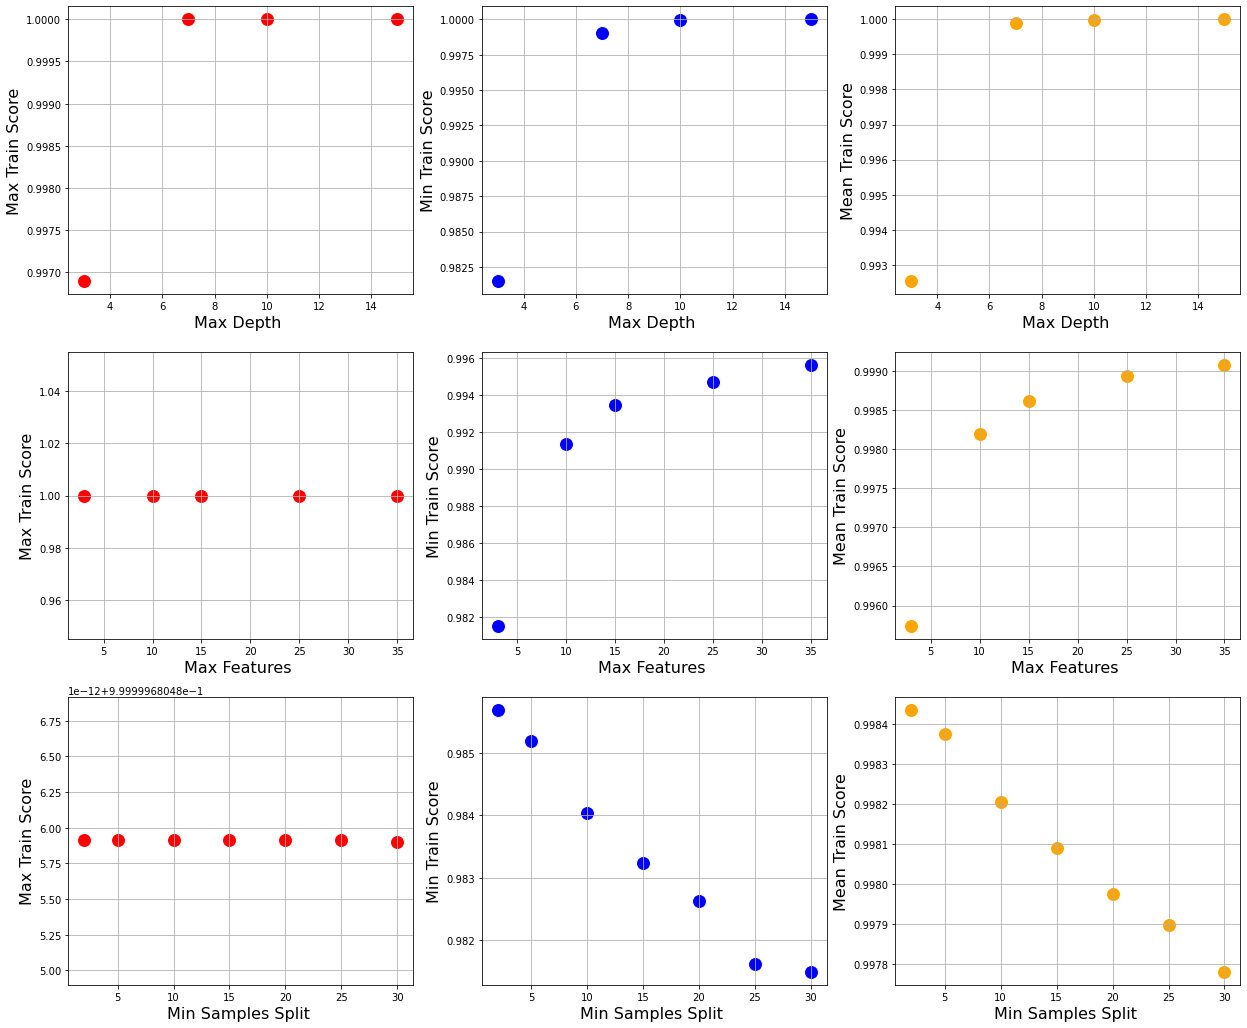

In [40]:
fig, axis = plt.subplots(3,3,figsize=(21,18))

sns.scatterplot(data = df_max_depth, x = 'param_max_depth', y ='train_max', color = 'red', s= 200, ax=axis[0,0])
axis[0,0].set_xlabel('Max Depth ', fontsize = 16)
axis[0,0].set_ylabel('Max Train Score', fontsize = 16)
#axis[0,0].set_ylim([0,1])
axis[0,0].grid()

sns.scatterplot(data = df_max_depth, x = 'param_max_depth', y ='train_min', color = 'blue', s= 200, ax=axis[0,1])
axis[0,1].set_xlabel('Max Depth ', fontsize = 16)
axis[0,1].set_ylabel('Min Train Score', fontsize = 16)
#axis[0,1].set_ylim([0,1])
axis[0,1].grid()

sns.scatterplot(data = df_max_depth, x = 'param_max_depth', y ='train_mean', color = 'orange', s= 200, ax=axis[0,2])
axis[0,2].set_xlabel('Max Depth ', fontsize = 16)
axis[0,2].set_ylabel('Mean Train Score', fontsize = 16)
#axis[0,2].set_ylim([0,1])
axis[0,2].grid()
########################################################################################################################
sns.scatterplot(data = df_max_features, x = 'param_max_features', y ='train_max', color = 'red', s= 200, ax=axis[1,0])
axis[1,0].set_xlabel('Max Features ', fontsize = 16)
axis[1,0].set_ylabel('Max Train Score', fontsize = 16)
#axis[1,0].set_ylim([0,1])
axis[1,0].grid()

sns.scatterplot(data = df_max_features, x = 'param_max_features', y ='train_min', color = 'blue', s= 200, ax=axis[1,1])
axis[1,1].set_xlabel('Max Features ', fontsize = 16)
axis[1,1].set_ylabel('Min Train Score', fontsize = 16)
#axis[1,1].set_ylim([0,1])
axis[1,1].grid()

sns.scatterplot(data = df_max_features, x = 'param_max_features', y ='train_mean', color = 'orange', s= 200, ax=axis[1,2])
axis[1,2].set_xlabel('Max Features ', fontsize = 16)
axis[1,2].set_ylabel('Mean Train Score', fontsize = 16)
#axis[1,2].set_ylim([0,1])
axis[1,2].grid()
#########################################################################################################################
sns.scatterplot(data = df_min_sample, x = 'param_min_samples_split', y ='train_max', color = 'red', s= 200, ax=axis[2,0])
axis[2,0].set_xlabel('Min Samples Split ', fontsize = 16)
axis[2,0].set_ylabel('Max Train Score', fontsize = 16)
#axis[2,0].set_ylim([0,1])
axis[2,0].grid()

sns.scatterplot(data = df_min_sample, x = 'param_min_samples_split', y ='train_min', color = 'blue', s= 200, ax=axis[2,1])
axis[2,1].set_xlabel('Min Samples Split ', fontsize = 16)
axis[2,1].set_ylabel('Min Train Score', fontsize = 16)
#axis[2,1].set_ylim([0,1])
axis[2,1].grid()

sns.scatterplot(data = df_min_sample, x = 'param_min_samples_split', y ='train_mean', color = 'orange', s= 200, ax=axis[2,2])
axis[2,2].set_xlabel('Min Samples Split ', fontsize = 16)
axis[2,2].set_ylabel('Mean Train Score', fontsize = 16)
#axis[2,2].set_ylim([0,1])
axis[2,2].grid();

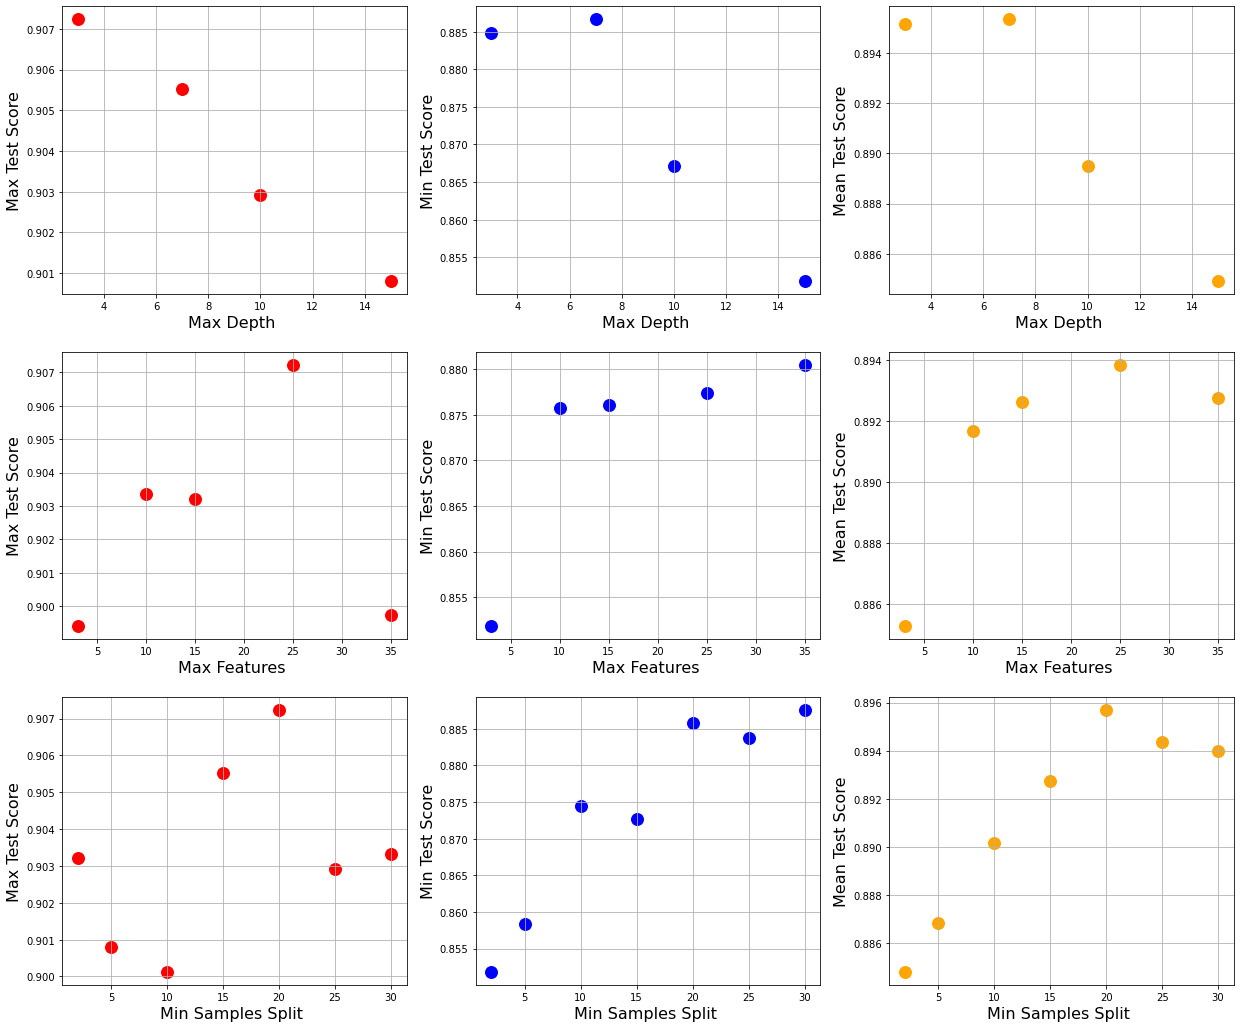

In [41]:
fig, axis = plt.subplots(3,3,figsize=(21,18))

sns.scatterplot(data = df_max_depth, x = 'param_max_depth', y ='test_max', color = 'red', s= 200, ax=axis[0,0])
axis[0,0].set_xlabel('Max Depth ', fontsize = 16)
axis[0,0].set_ylabel('Max Test Score', fontsize = 16)
#axis[0,0].set_ylim([0,1])
axis[0,0].grid()

sns.scatterplot(data = df_max_depth, x = 'param_max_depth', y ='test_min', color = 'blue', s= 200, ax=axis[0,1])
axis[0,1].set_xlabel('Max Depth ', fontsize = 16)
axis[0,1].set_ylabel('Min Test Score', fontsize = 16)
#axis[0,1].set_ylim([0,1])
axis[0,1].grid()

sns.scatterplot(data = df_max_depth, x = 'param_max_depth', y ='test_mean', color = 'orange', s= 200, ax=axis[0,2])
axis[0,2].set_xlabel('Max Depth ', fontsize = 16)
axis[0,2].set_ylabel('Mean Test Score', fontsize = 16)
#axis[0,2].set_ylim([0,1])
axis[0,2].grid()
########################################################################################################################
sns.scatterplot(data = df_max_features, x = 'param_max_features', y ='test_max', color = 'red', s= 200, ax=axis[1,0])
axis[1,0].set_xlabel('Max Features ', fontsize = 16)
axis[1,0].set_ylabel('Max Test Score', fontsize = 16)
#axis[1,0].set_ylim([0,1])
axis[1,0].grid()

sns.scatterplot(data = df_max_features, x = 'param_max_features', y ='test_min', color = 'blue', s= 200, ax=axis[1,1])
axis[1,1].set_xlabel('Max Features ', fontsize = 16)
axis[1,1].set_ylabel('Min Test Score', fontsize = 16)
#axis[1,1].set_ylim([0,1])
axis[1,1].grid()

sns.scatterplot(data = df_max_features, x = 'param_max_features', y ='test_mean', color = 'orange', s= 200, ax=axis[1,2])
axis[1,2].set_xlabel('Max Features ', fontsize = 16)
axis[1,2].set_ylabel('Mean Test Score', fontsize = 16)
#axis[1,2].set_ylim([0,1])
axis[1,2].grid()
#########################################################################################################################
sns.scatterplot(data = df_min_sample, x = 'param_min_samples_split', y ='test_max', color = 'red', s= 200, ax=axis[2,0])
axis[2,0].set_xlabel('Min Samples Split ', fontsize = 16)
axis[2,0].set_ylabel('Max Test Score', fontsize = 16)
#axis[2,0].set_ylim([0,1])
axis[2,0].grid()

sns.scatterplot(data = df_min_sample, x = 'param_min_samples_split', y ='test_min', color = 'blue', s= 200, ax=axis[2,1])
axis[2,1].set_xlabel('Min Samples Split ', fontsize = 16)
axis[2,1].set_ylabel('Min Test Score', fontsize = 16)
#axis[2,1].set_ylim([0,1])
axis[2,1].grid()

sns.scatterplot(data = df_min_sample, x = 'param_min_samples_split', y ='test_mean', color = 'orange', s= 200, ax=axis[2,2])
axis[2,2].set_xlabel('Min Samples Split ', fontsize = 16)
axis[2,2].set_ylabel('Mean Test Score', fontsize = 16)
#axis[2,2].set_ylim([0,1])
axis[2,2].grid();

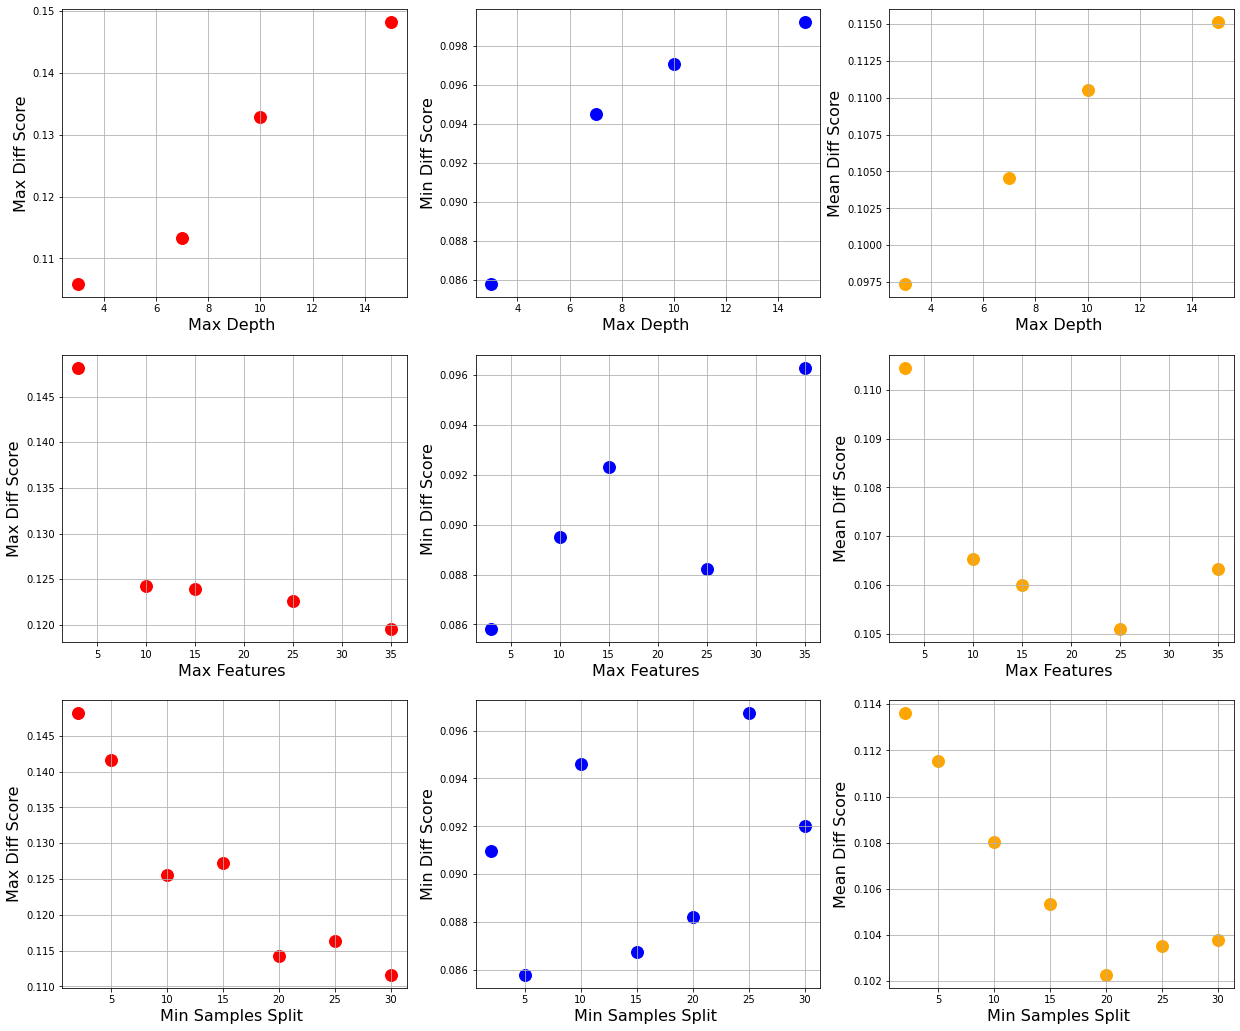

In [42]:
fig, axis = plt.subplots(3,3,figsize=(21,18))

sns.scatterplot(data = df_max_depth, x = 'param_max_depth', y ='diff_max', color = 'red', s= 200, ax=axis[0,0])
axis[0,0].set_xlabel('Max Depth ', fontsize = 16)
axis[0,0].set_ylabel('Max Diff Score', fontsize = 16)
#axis[0,0].set_ylim([0,1])
axis[0,0].grid()

sns.scatterplot(data = df_max_depth, x = 'param_max_depth', y ='diff_min', color = 'blue', s= 200, ax=axis[0,1])
axis[0,1].set_xlabel('Max Depth ', fontsize = 16)
axis[0,1].set_ylabel('Min Diff Score', fontsize = 16)
#axis[0,1].set_ylim([0,1])
axis[0,1].grid()

sns.scatterplot(data = df_max_depth, x = 'param_max_depth', y ='diff_mean', color = 'orange', s= 200, ax=axis[0,2])
axis[0,2].set_xlabel('Max Depth ', fontsize = 16)
axis[0,2].set_ylabel('Mean Diff Score', fontsize = 16)
#axis[0,2].set_ylim([0,1])
axis[0,2].grid()
########################################################################################################################
sns.scatterplot(data = df_max_features, x = 'param_max_features', y ='diff_max', color = 'red', s= 200, ax=axis[1,0])
axis[1,0].set_xlabel('Max Features ', fontsize = 16)
axis[1,0].set_ylabel('Max Diff Score', fontsize = 16)
#axis[1,0].set_ylim([0,1])
axis[1,0].grid()

sns.scatterplot(data = df_max_features, x = 'param_max_features', y ='diff_min', color = 'blue', s= 200, ax=axis[1,1])
axis[1,1].set_xlabel('Max Features ', fontsize = 16)
axis[1,1].set_ylabel('Min Diff Score', fontsize = 16)
#axis[1,1].set_ylim([0,1])
axis[1,1].grid()

sns.scatterplot(data = df_max_features, x = 'param_max_features', y ='diff_mean', color = 'orange', s= 200, ax=axis[1,2])
axis[1,2].set_xlabel('Max Features ', fontsize = 16)
axis[1,2].set_ylabel('Mean Diff Score', fontsize = 16)
#axis[1,2].set_ylim([0,1])
axis[1,2].grid()
#########################################################################################################################
sns.scatterplot(data = df_min_sample, x = 'param_min_samples_split', y ='diff_max', color = 'red', s= 200, ax=axis[2,0])
axis[2,0].set_xlabel('Min Samples Split ', fontsize = 16)
axis[2,0].set_ylabel('Max Diff Score', fontsize = 16)
#axis[2,0].set_ylim([0,1])
axis[2,0].grid()

sns.scatterplot(data = df_min_sample, x = 'param_min_samples_split', y ='diff_min', color = 'blue', s= 200, ax=axis[2,1])
axis[2,1].set_xlabel('Min Samples Split ', fontsize = 16)
axis[2,1].set_ylabel('Min Diff Score', fontsize = 16)
#axis[2,1].set_ylim([0,1])
axis[2,1].grid()

sns.scatterplot(data = df_min_sample, x = 'param_min_samples_split', y ='diff_mean', color = 'orange', s= 200, ax=axis[2,2])
axis[2,2].set_xlabel('Min Samples Split ', fontsize = 16)
axis[2,2].set_ylabel('Mean Diff Score', fontsize = 16)
#axis[2,2].set_ylim([0,1])
axis[2,2].grid();